# Data Loading

Loaded four datasets for analysis:  
- **deliveries** (main transactions)  
- **drivers** (driver details)  
- **warehouses** (warehouse info)  
- **zones** (zone attributes)  

Dates were parsed correctly, and initial inspection confirmed data structure and consistency.  


In [1]:
#Data Loading
import pandas as pd
from pathlib import Path


DATA_DIR = Path("../data")


#Loading CSV
deliveries = pd.read_csv(DATA_DIR / "data_deliveries.csv", parse_dates=["date"])
drivers = pd.read_csv(DATA_DIR / "data_drivers.csv", parse_dates=["last_training_date"])
warehouses = pd.read_csv(DATA_DIR / "data_warehouses.csv")
zones = pd.read_csv(DATA_DIR / "data_zones.csv")

# Print dataset shapes
print("deliveries:", deliveries.shape)
print("drivers:", drivers.shape)
print("warehouses:", warehouses.shape)
print("zones:", zones.shape)

# Preview first 3 rows
print("\nSample deliveries data:")
display(deliveries.head(3))

print("\nSample drivers data:")
display(drivers.head(3))

print("\nSample warehouses data:")
display(warehouses.head(3))

print("\nSample zones data:")
display(zones.head(3))

deliveries: (45000, 30)
drivers: (50, 13)
warehouses: (8, 11)
zones: (30, 11)

Sample deliveries data:


,package_id,date,time_of_day,driver_id,warehouse_id,delivery_zone_id,package_type,package_weight,package_width,package_height,...,is_return_trip,customer_id,payment_method,promotional_code_used,is_new_customer,package_insurance,has_mobile_notification,delivery_cost,profitability,optimization_factor
0,6fa6b079,2025-03-13,11:00,D037,W06,Z29,Standard,11.86,33.1,40.2,...,False,C5766,PayPal,True,False,True,True,15.90,22.40,0.533834
1,b3d5e13e,2025-01-31,18:37,D036,W02,Z30,Same-day,7.34,29.3,20.8,...,False,C4308,Invoice,False,False,False,True,41.15,-21.00,0.825857
2,efa0e968,2025-03-05,17:13,D030,W08,Z13,Heavy,19.04,13.3,64.2,...,False,C8589,Invoice,False,True,False,False,24.38,-13.24,0.469083



Sample drivers data:


,driver_id,driver_name,license_number,driver_rating,years_experience,vehicle_type,home_warehouse,shift_preference,max_packages_per_day,has_refrigeration_unit,last_training_date,salary_tier,bonus_eligible
0,D001,Driver 1,L31068,4.05,1,Motorcycle,W08,Night,27,False,2025-02-10,3,True
1,D002,Driver 2,L44164,4.00,4,Motorcycle,W03,Afternoon,58,False,2025-02-11,2,True
2,D003,Driver 3,L99368,4.75,1,Van,W05,Morning,84,True,2025-02-12,2,True



Sample warehouses data:


,warehouse_id,warehouse_name,capacity,location_latitude,location_longitude,operating_hours,manager_id,refrigeration_capacity,has_automated_sorting,maintenance_schedule,electricity_cost
0,W01,Warehouse A,3597,40.802807,-73.961812,06:00-22:00,M01,1051,True,Weekly,3677.70
1,W02,Warehouse B,3301,40.791033,-73.655684,06:00-24:00,M02,961,False,Weekly,1832.35
2,W03,Warehouse C,1768,40.943624,-73.797968,06:00-24:00,M03,191,True,Monthly,1661.77



Sample zones data:


,zone_id,zone_name,distance_from_hub,population,avg_income,urban_density,primary_warehouse,zone_type,avg_delivery_time,parking_difficulty,zone_growth_rate
0,Z01,Zone 1,10.6,24762,36568.36,Medium,W02,Commercial,3.5,3,-0.0352
1,Z02,Zone 2,14.1,7171,31920.30,High,W05,Residential,3.4,5,0.0301
2,Z03,Zone 3,7.6,89059,93144.32,Low,W07,Industrial,3.5,4,0.0998


# Data Quality Assessment & Cleaning

Before performing analysis, it is crucial to assess the quality of all datasets. This involves:

- **Checking for missing values**: Missing data can cause errors or bias results. 
- **Checking for duplicates**: Duplicate rows can skew statistics and insights.
- **Verifying data types**: Ensures dates, numeric, and categorical columns are correctly recognized.
- **Initial cleaning**: Impute or fill missing values, drop duplicates, and convert dates.

This step ensures that the data is reliable, clean, and ready for feature engineering and analysis.


In [2]:
# Function to summarize dataset quality

def data_quality_summary(df,name):
    print(f"-----{name}-----")
    print("shape:",df.shape)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nduplicates:", df.duplicated().sum())
    print("\ndatatypes:",df.dtypes)
    print("\n")


# Check all datasets
data_quality_summary(deliveries, "Deliveries")
data_quality_summary(drivers, "Drivers")
data_quality_summary(warehouses, "Warehouses")
data_quality_summary(zones, "Zones")

-----Deliveries-----
shape: (45000, 30)

Missing Values:
 package_id                    0
date                          0
time_of_day                   0
driver_id                     0
warehouse_id                  0
delivery_zone_id              0
package_type                  0
package_weight             2306
package_width                 0
package_height                0
package_depth                 0
package_value              2236
promised_delivery_time        0
actual_delivery_time          0
delivery_status               0
customer_rating            2237
weather_condition             0
traffic_condition             0
fuel_consumption           2496
vehicle_type                  0
is_return_trip                0
customer_id                   0
payment_method                0
promotional_code_used         0
is_new_customer               0
package_insurance             0
has_mobile_notification       0
delivery_cost              2306
profitability              6358
optimization_f

# Data Quality Assessment & Cleaning

Before performing any analysis, it is crucial to assess the quality of all datasets. This involves checking for:

- **Missing values:** Identifying incomplete data to prevent errors or biased insights.
- **Duplicate rows:** Ensuring no repeated entries skew results.
- **Data types:** Verifying dates, numeric, and categorical columns are correctly recognized.

### Summary of Findings

**Deliveries** (45,000 rows × 30 columns):
- Missing values found in `package_weight` (2,306), `package_value` (2,236), `customer_rating` (2,237), `fuel_consumption` (2,496), `delivery_cost` (2,306), `profitability` (6,358).
- No duplicate rows.
- Data types are consistent with expectations; `date` is datetime, numeric fields are float, categorical fields are object or bool.

**Drivers** (50 rows × 13 columns):
- No missing values.
- No duplicates.
- `last_training_date` is datetime, other numeric fields are float/int, categorical fields are object/bool.

**Warehouses** (8 rows × 11 columns):
- No missing values or duplicates.
- Data types are correct.

**Zones** (30 rows × 11 columns):
- No missing values or duplicates.
- Data types are correct.

### Cleaning Steps

- Duplicates were dropped from all datasets to ensure integrity (though none were found).
- Missing numeric values in `deliveries` were imputed with median values.
- Missing categorical values were filled with 'Unknown'.
- Dates were ensured to be in proper datetime format.

These steps ensure the datasets are clean, reliable, and ready for **feature engineering and analysis**.


In [3]:
#removing duplicates if any

deliveries = deliveries.drop_duplicates()
drivers = drivers.drop_duplicates()
warehouses = warehouses.drop_duplicates()
zones = zones.drop_duplicates()

#Convert date columns to datetime (if not already)
deliveries['date'] = pd.to_datetime(deliveries['date'])
drivers['last_training_date'] = pd.to_datetime(drivers['last_training_date'])

#Impute missing numeric values with median (Deliveries dataset)
cols_to_impute = ['package_weight','package_value','customer_rating','fuel_consumption','delivery_cost','profitability']

for col in cols_to_impute:
    median_val = deliveries[col].median()
    deliveries[col] = deliveries[col].fillna(median_val)


#Fill missing categorical values with 'Unknown' if any
catagorical_cols_to_impute = ['package_type']

for col in catagorical_cols_to_impute:
    deliveries[col] = deliveries[col].fillna('Unknown')

print("Post cleaning missing Values in deliveries:")
print(deliveries.isnull().sum())


Post cleaning missing Values in deliveries:
package_id                 0
date                       0
time_of_day                0
driver_id                  0
warehouse_id               0
delivery_zone_id           0
package_type               0
package_weight             0
package_width              0
package_height             0
package_depth              0
package_value              0
promised_delivery_time     0
actual_delivery_time       0
delivery_status            0
customer_rating            0
weather_condition          0
traffic_condition          0
fuel_consumption           0
vehicle_type               0
is_return_trip             0
customer_id                0
payment_method             0
promotional_code_used      0
is_new_customer            0
package_insurance          0
has_mobile_notification    0
delivery_cost              0
profitability              0
optimization_factor        0
dtype: int64


## Post-Cleaning Summary

After cleaning:

- All duplicate rows were removed (none existed, but step ensures integrity).
- Missing numeric values in key columns were filled with median values.
- Missing categorical values were filled with 'Unknown'.
- Date columns are correctly formatted as datetime.

This ensures the datasets are fully prepared for **feature engineering**, which will allow us to create new variables to analyze delivery efficiency.


## Dataset Merging Process

To create a unified dataset for analysis, I merged the **Deliveries**, **Drivers**, and **Zones** datasets.  

- **Drivers → Deliveries**  
  - Common key: `driver_id`  
  - Only the `driver_id` and `years_of_experience` columns were merged in.  
  - An **inner join** was used to ensure only deliveries with valid driver records were included.  

- **Zones → Deliveries**  
  - Common keys: `delivery_zone_id` (Deliveries) and `zone_id` (Zones)  
  - All zone-related columns were merged in.  
  - An **inner join** was again used to avoid introducing `NaN` values.  
  - Duplicate `zone_id` was dropped to prevent redundancy since `delivery_zone_id` already existed.  

This process resulted in an **enriched dataset** (`deliveries_enriched`) containing:  
- All original delivery information  
- Driver experience details  
- Zone-related attributes  

Keeping the original datasets (`deliveries`, `drivers`, `zones`) untouched ensures reproducibility,  
while the merged dataset is used for all subsequent analysis and visualization.


In [4]:
# Keep raw deliveries
deliveries_raw = deliveries.copy()

# Create enriched dataset for analysis
deliveries_enriched = (
    deliveries_raw
    .merge(drivers[["driver_id", "years_experience"]], on="driver_id", how="left", suffixes=("","_drivers"))
    .merge(zones, left_on="delivery_zone_id", right_on="zone_id", how="left", suffixes=("","_zones"))
    
)


# Feature Engineering

Feature engineering involves creating new variables from existing data to better understand delivery efficiency and performance. 

The following features will be created:

1. **Delivery Delay** – Difference between actual and promised delivery time (hours).
2. **Is Delayed** – Binary variable: 1 if delivery was late, 0 if on time.
3. **Fuel Efficiency** – Fuel consumption per km: `fuel_consumption / distance_from_hub`.
4. **Driver Experience Bucket** – Categorize drivers based on years of experience (Novice, Intermediate, Expert).

These features will help analyze factors influencing delivery times and efficiency.


## Feature Engineering Summary

After feature engineering:

- **Delivery Delay:** Captures how late each delivery was relative to promised time.
- **Is Delayed:** Simplifies analysis by converting delays into a binary variable.
- **Fuel Efficiency:** Accounts for fuel used relative to distance, helping optimize cost and vehicle assignment.
- **Driver Experience Level:** Categorizes drivers to analyze if experience impacts delivery performance.

These new features provide meaningful answer on delivery efficiency and performance factors.


In [5]:
#Delivery Delay
deliveries_enriched['delivery_delay'] = deliveries_enriched['actual_delivery_time'] - deliveries_enriched['promised_delivery_time']

#Is delayed (0 = on time, 1 = delayed)
deliveries_enriched['is_delayed'] = deliveries_enriched['delivery_delay'].apply(lambda x:1 if x > 0 else 0)


#Fuel efficiency

deliveries_enriched['fuel_efficiency'] = deliveries_enriched['fuel_consumption'] / deliveries_enriched['distance_from_hub']


#Driver Experience Bucket

def experience_bucket(years):
    if years<3:
        return 'Novice'
    
    elif years<7:
        return 'Intermediate'
    
    else:
        return 'Expert'
    
deliveries_enriched['driver_experience_level'] = deliveries_enriched['years_experience'].apply(experience_bucket)

## Creating a Positive-Only Delivery Delay Metric

During the analysis, I noticed that the **Delivery Delay** variable also contained **negative values**,  
which represent **early deliveries**.  

Since the focus is on delays, I created a new metric called **Delivery Time**,  
which only retains the **positive values** (actual delayed time).  

This ensures that subsequent analysis (distribution, correlations, and impact studies)  
are based solely on **delays**, not early deliveries.


In [6]:
deliveries_enriched['delay_time']= deliveries_enriched['delivery_delay'].apply(lambda x:x if x>0 else 0)

## Distribution of Delivery Delay Time

To understand how delivery delays are distributed, I plotted a **histogram** of the `delay_time` variable from the deliveries dataset.  
This helps to identify whether delays are normally distributed, skewed, or contain outliers.  


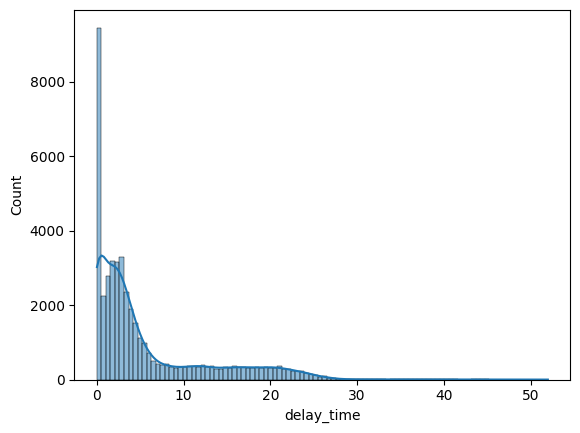

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(deliveries_enriched['delay_time'],bins=100,kde=True)
plt.show()


## Correlation Analysis of Delivery Performance Metrics

To evaluate the factors that may influence **delivery performance**, I selected the following metrics:

- **Delay Time**  
- **Fuel Consumption**  
- **Fuel Efficiency**  
- **Delivery Delay**  
- **Weather Condition**  
- **Traffic Condition**  
- **Driver Experience Level**

Since *Weather Condition*, *Traffic Condition*, and *Driver Experience Level* were categorical, I converted them into **numeric representations** to include them in the correlation analysis.

After preparing the data, I plotted a **correlation heatmap** to visualize the relationships between these variables and identify the strongest drivers of delivery performance.


In [8]:
weather_enc= {'Windy':1,'Rainy':2,'Clear':3,'Stormy':4,'Cloudy':5,'Snowy':6,'Foggy':7}
traffic_enc={'Moderate':1,'Severe':2,'Heavy':3,'Light':4}
experience_enc={'Expert':3,'Intermediate':2,'Novice':1}
deliveries_enriched['weather_encoding'] = deliveries_enriched['weather_condition'].apply(lambda x:weather_enc[x])
deliveries_enriched['traffic_encoding'] = deliveries_enriched['traffic_condition'].apply(lambda x:traffic_enc[x])
deliveries_enriched['driver_experience_encoding']= deliveries_enriched['driver_experience_level'].apply(lambda x:experience_enc[x])

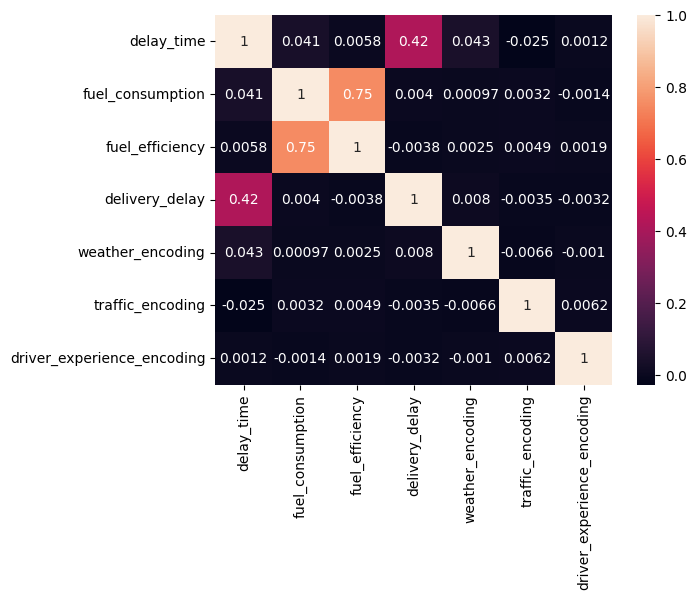

In [9]:
corr= deliveries_enriched[['delay_time','fuel_consumption','fuel_efficiency','delivery_delay','weather_encoding','traffic_encoding','driver_experience_encoding']].corr()
sns.heatmap(corr, annot=True)
plt.show()

## Scatterplot Analysis: Weather & Traffic Impact on Delivery

The correlation heatmap did not show any strong linear relationships among the selected variables.  
Since **Weather Condition** and **Traffic Condition** are still expected to significantly affect delivery performance,  
I plotted **scatterplots** to further explore their impact on **Delivery Delay Time**.  

This allows for a more detailed inspection of potential **non-linear patterns** or clusters that the correlation matrix may have missed.


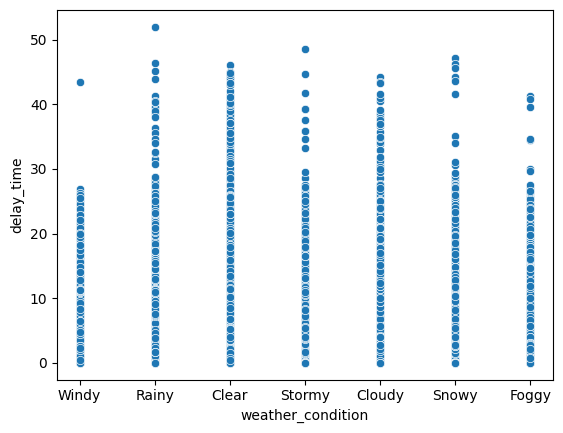

In [10]:

sns.scatterplot(data=deliveries_enriched, y='delay_time', x='weather_condition')
plt.show()

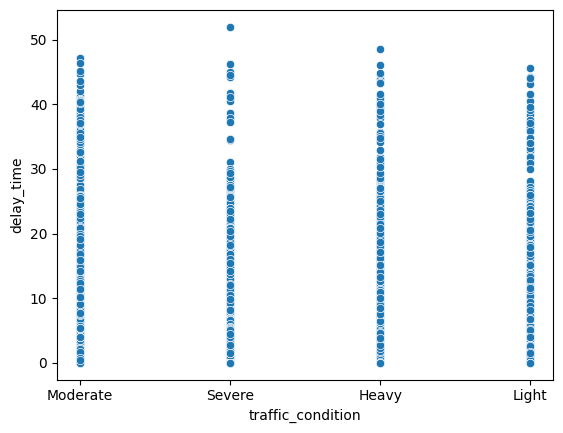

In [11]:
sns.scatterplot(data=deliveries_enriched,x='traffic_condition', y='delay_time')
plt.show()

## Findings: Traffic & Weather vs Delivery Performance

After analyzing **Delay Time** against **Traffic Conditions** and **Weather Conditions** using scatterplots,  
I did **not observe any significant patterns or strong relationships**.  

This result was **surprising**, since based on prior expectations and real-world experience,  
both weather and traffic conditions were assumed to have a **major impact** on delivery performance.  

The absence of a clear pattern suggests that:
- Either these factors are **not captured with enough granularity** in the dataset, or  
- Other hidden variables (e.g., vehicle type, zones, parking difficulty or seasonal speciality )  
  may play a larger role in influencing delivery delays.


## Boxplot Analysis: Weather & Traffic Conditions

To further confirm the earlier findings, I plotted **boxplots** of  
**Delay Time** and **Delivery Status** against **Weather Conditions** and **Traffic Conditions**.  

The goal was to identify whether there might be **any subtle patterns** or differences  
that were not visible in the scatterplots.  

However, even with this approach, I find small variations, could not find any strong or consistent patterns  
linking weather or traffic conditions with delivery performance.


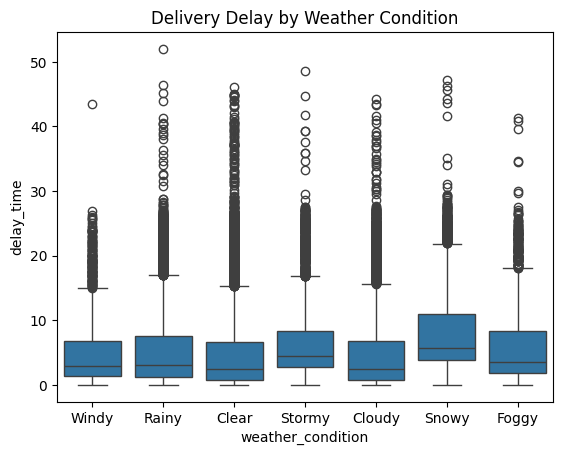

In [12]:
sns.boxplot(x='weather_condition', y='delay_time', data=deliveries_enriched)
plt.title("Delivery Delay by Weather Condition")
plt.show()

## Key Insight: Severe Conditions and Delays

From the **boxplot analysis**, I observed that a portion of deliveries tend to experience  
**significant delays** under the following conditions:

- **Severe and Heavy Traffic**  
- **Stormy and Snowy Weather**

These findings suggest that adverse conditions do contribute to increased delivery delays.  
However, since delays also occur in normal conditions, we cannot conclude that  
**traffic and weather alone** are the primary drivers of delivery performance.  

Other operational or external factors may still be influencing the outcomes.


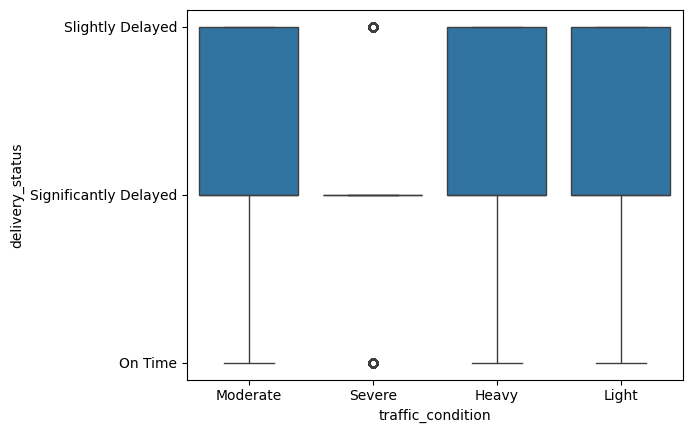

In [13]:
sns.boxplot(data=deliveries_enriched, x='traffic_condition', y='delivery_status')
plt.show()

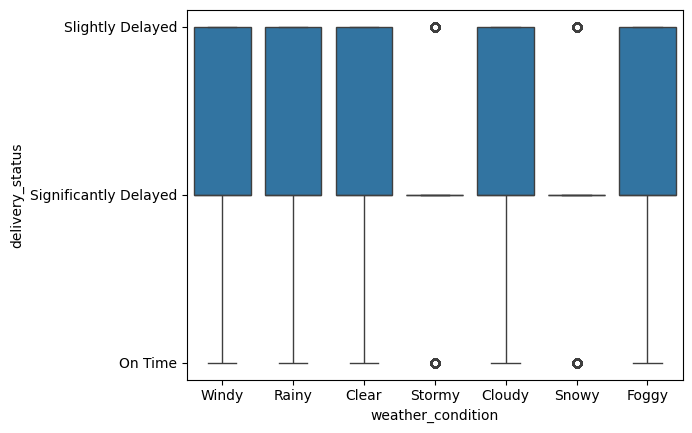

In [14]:
sns.boxplot(data=deliveries_enriched, x='weather_condition', y='delivery_status')
plt.show()

## Delivery Cost, Profitability, and Vehicle Type Analysis

After exploring delay-related factors, I extended the analysis to include  
**delivery cost** and **profitability**, with a focus on how these metrics vary  
across different **vehicle types**.  

To capture potential relationships, I examined:  

- **Delivery Cost & Profitability in relation to Delay Time and vehicle type**  

For better clarity, I plotted **separate scatterplots for each vehicle type**.  
This approach makes it easier to identify whether certain vehicle categories are  
associated with **higher costs, reduced profitability, or increased delays**.  

By combining cost, profitability, and delay time, the goal was to determine if  
vehicle selection plays a significant role in shaping **operational efficiency**  
and overall **delivery performance**.



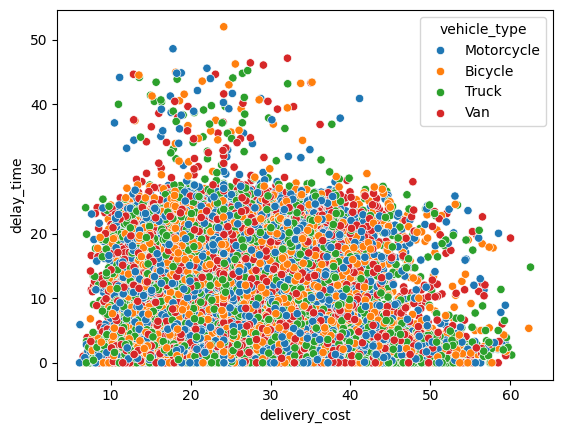

In [15]:
sns.scatterplot(data=deliveries_enriched, x='delivery_cost', y='delay_time', hue='vehicle_type')
plt.show()

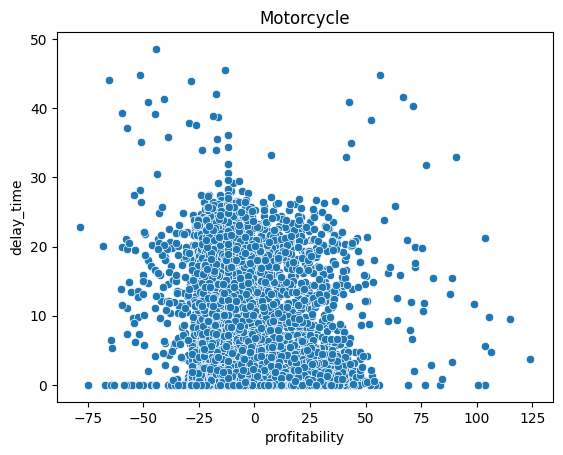

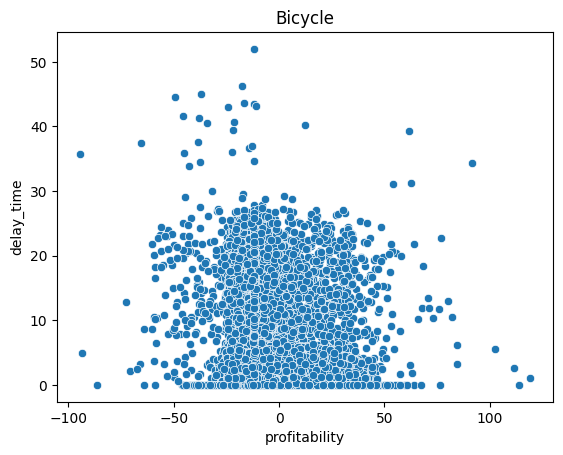

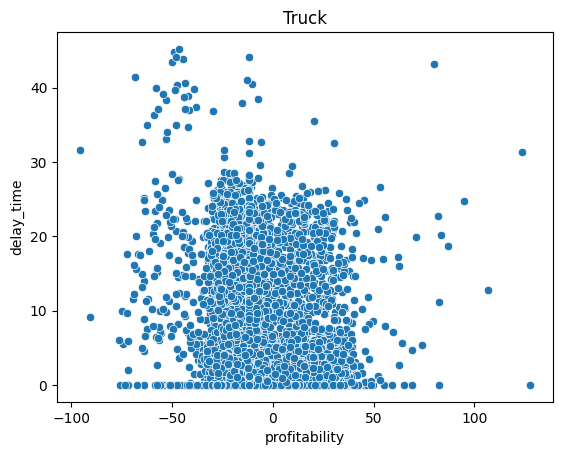

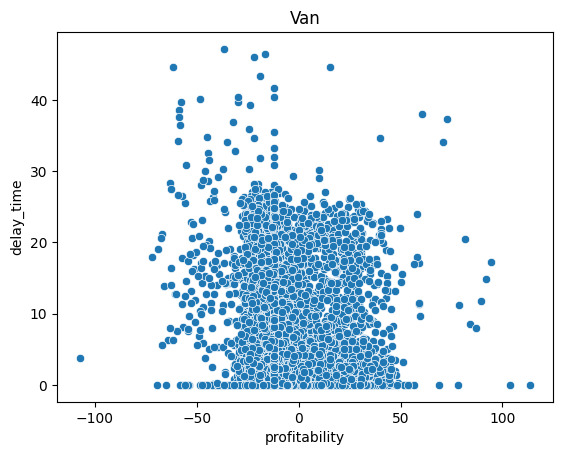

In [16]:
types=['Motorcycle','Bicycle','Truck','Van']
for vehicle in types:
    filtered=deliveries_enriched[deliveries_enriched['vehicle_type']==vehicle]
    sns.scatterplot(filtered, x='profitability', y='delay_time')
    plt.title(vehicle)
    plt.show()

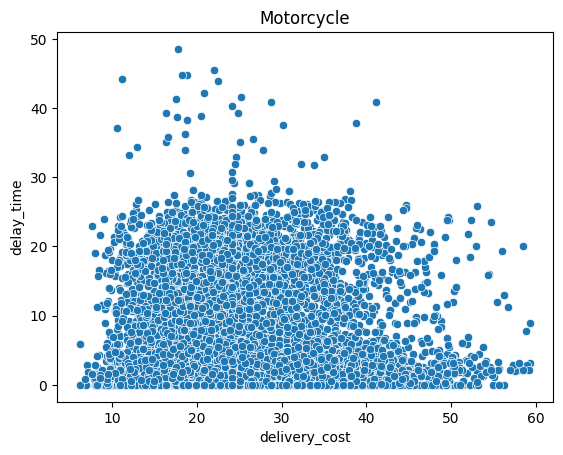

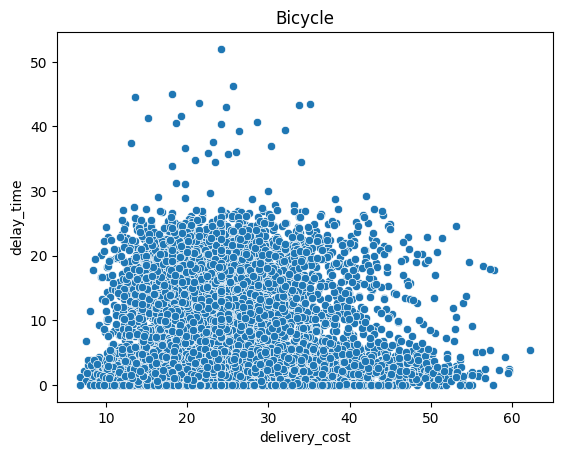

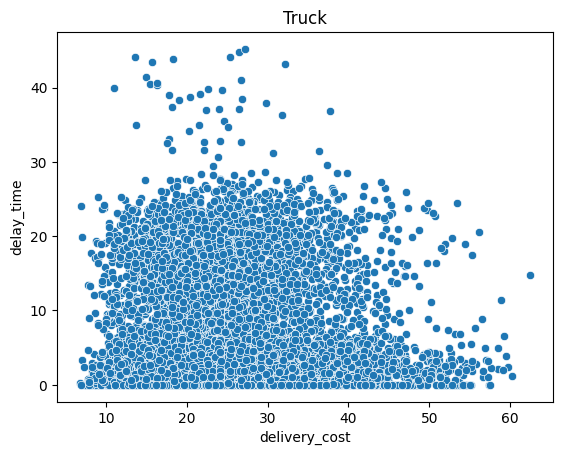

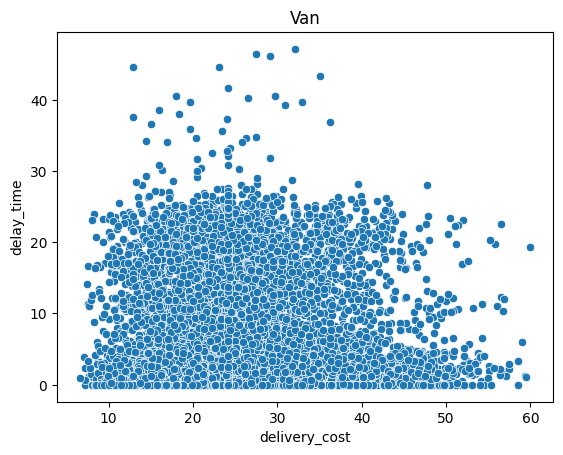

In [17]:
types=['Motorcycle','Bicycle','Truck','Van']
for vehicle in types:
    filtered=deliveries_enriched[deliveries_enriched['vehicle_type']==vehicle]
    sns.scatterplot(filtered, x='delivery_cost', y='delay_time')
    plt.title(vehicle)
    plt.show()

## Findings: Vehicle Type, Cost, and Profitability

Scatterplot analysis of **Delivery Cost**, **Profitability**, and **Delay Time**  
across **Vehicle Types** revealed only **minor patterns**: a few vehicle types showed  
small variations in cost and profitability.  

However, these patterns were based on a **very limited number of data points**  
and are therefore **negligible**. The majority of the data showed no clear  
relationship, suggesting that **vehicle type is not a significant driver**  
of delivery performance, cost efficiency, or profitability.  


## Date & Seasonal Analysis of Delivery Performance

After finding no strong impact from vehicle type, cost, or profitability,  
I shifted the focus to **temporal factors**. Specifically, I analyzed **Delay Time**  
with respect to **dates** to investigate whether there are any:  

- **Seasonal patterns** (e.g., winter vs summer effects)  
- **Monthly or weekly trends** (e.g., weekday vs weekend delays)  
- **Holiday or event-related spikes** in delivery delays  

The goal was to identify if delivery performance shows **seasonal specialities**  
or time-based fluctuations that could explain part of the variation in delay times.  


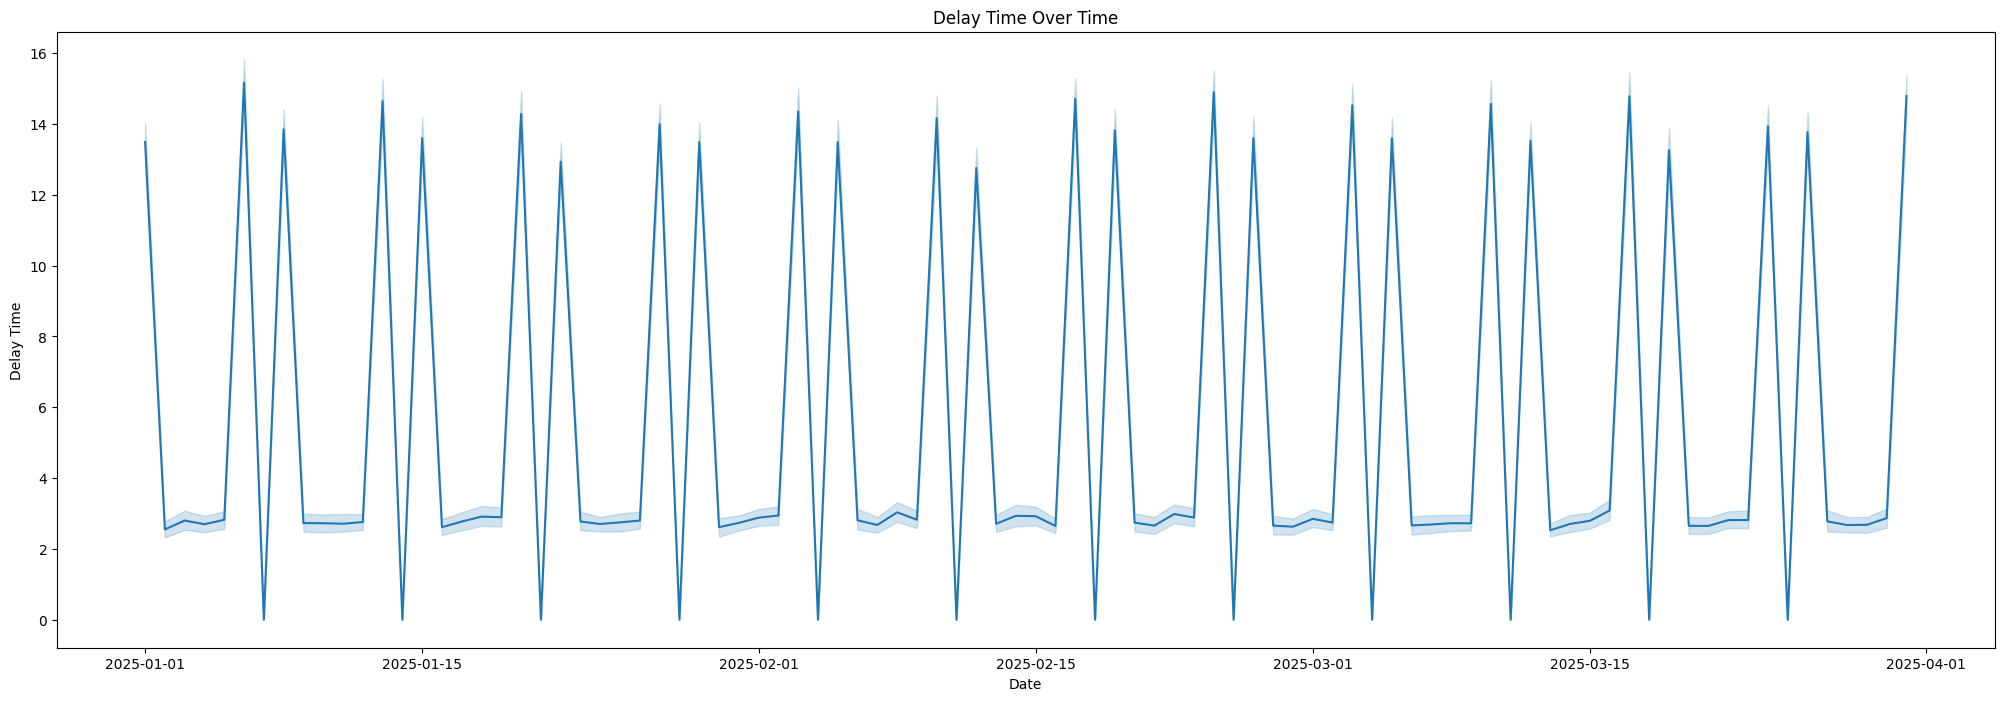

In [18]:
plt.figure(figsize=(25,8))
sns.lineplot(deliveries_enriched, x='date', y='delay_time')
plt.xlabel('Date')
plt.ylabel('Delay Time')
plt.title('Delay Time Over Time')
plt.show()

## Time-Series Patterns in Delivery Delays

When plotting a **line plot of Delay Time over Date**, I noticed a **repeating pattern**  
that appeared consistently over time.  

To better understand this trend, I performed a deeper analysis to check whether  
specific **weekdays** or **months** play a critical role in delivery performance.  

The objective was to identify:  
- If certain **days of the week** (e.g., Mondays or weekends) are prone to higher delays  
- If particular **months or seasons** consistently show spikes in delay time  
- Whether these time-based effects align with operational or external factors  


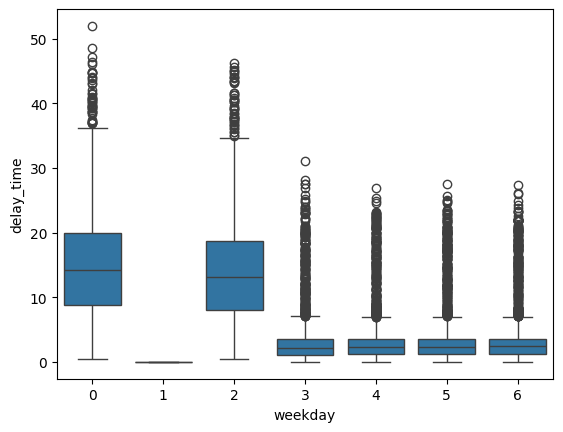

In [19]:
deliveries_enriched["weekday"] = deliveries_enriched["date"].dt.weekday
sns.boxplot(deliveries_enriched, x='weekday', y='delay_time')
plt.show()

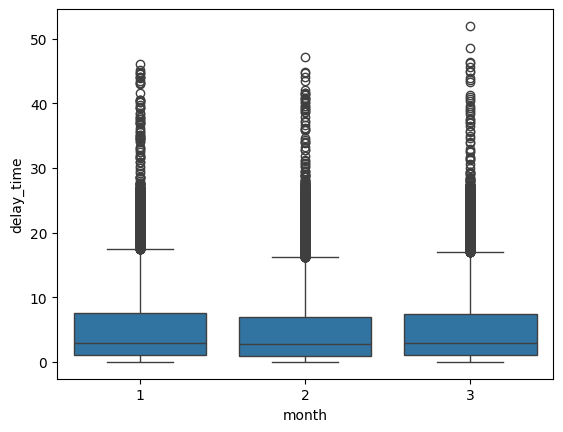

In [20]:
deliveries_enriched["month"] = deliveries_enriched["date"].dt.month
sns.boxplot(deliveries_enriched, x='month', y='delay_time')
plt.show()

## Weekday and Monthly Impact on Delivery Delays

From the temporal analysis, I found that **months do not play a significant role**  
in influencing delivery delays. However, a clear **weekday pattern** emerged:

- **Mondays and Wednesdays** show **significantly higher delays** compared to other days.  
- **Tuesdays** exhibit a **notable dip**, with the lowest delay times of the week.  
- Other weekdays remain relatively stable, without strong variations.  

This suggests that **weekday-specific operational factors** (such as workload distribution,  
scheduling practices, or demand surges) may be influencing delivery performance  
more than seasonal or monthly trends.


## Boxplot Analysis of Geographical & Demographic Factors

To investigate whether **geographical and demographic variables** influence  
delivery performance, I plotted **boxplots** of **Delay Time** against:  

- **Distance from Hub**  
- **Population**  
- **Zones**  
- **Primary Warehouse**  
- **Zone growth rate**

The goal of this analysis was to check if deliveries associated with certain  
zones, population densities, or warehouse assignments show **systematic differences**  
in delay times, which could point to **location-driven performance challenges**.


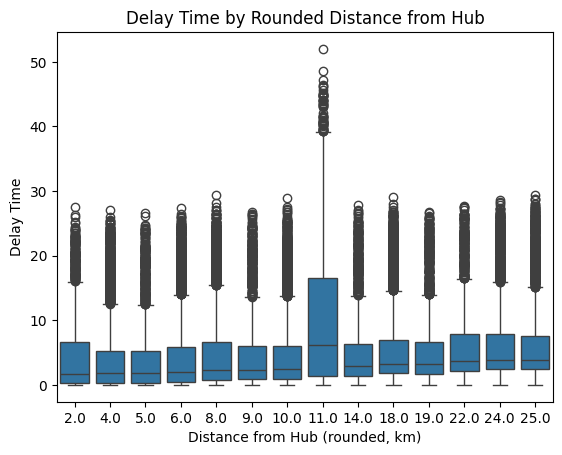

In [21]:
# Round distance_from_hub for x-axis
deliveries_enriched['distance_from_hub_rounded'] = deliveries_enriched['distance_from_hub'].round()
sns.boxplot(deliveries_enriched, x='distance_from_hub_rounded', y='delay_time')
plt.xlabel('Distance from Hub (rounded, km)')
plt.ylabel('Delay Time')
plt.title('Delay Time by Rounded Distance from Hub')
plt.show()

## Key Finding: Distance from Hub vs Delivery Delays

From the boxplot analysis, I observed that **distance from the hub** does  
influence delivery delays — but not in the expected way.  

- The **longest distances** from the hub did **not** show the highest delays.  
- Instead, deliveries at an **intermediate (middle-range) distance** from the hub  
  experienced the **most significant delays**.  

This suggests that factors other than simple travel distance — such as **routing  
complexity, traffic density at mid-range zones, or allocation inefficiencies** —  
may be contributing to these delays.


## Patterns Across Population, Zone, Income, and Warehouse Factors

Similar patterns emerged when analyzing **Population**, **Zone ID**,  
**Average Income**,**Zone growth rate** and **Primary warehouse**

In each case, certain categories or ranges showed **significantly higher delays**,  
while others remained relatively stable.  

This led to the conclusion that these variables may be **interconnected**,  
potentially pointing to a **specific area, zone, or warehouse** that is consistently  
underperforming.  

⚠️ However, since the dataset does not explicitly confirm whether these factors  
represent the **same region**, this remains an **assumption** rather than a verified fact.  
Additional data would be required to confirm the overlap between these variables.


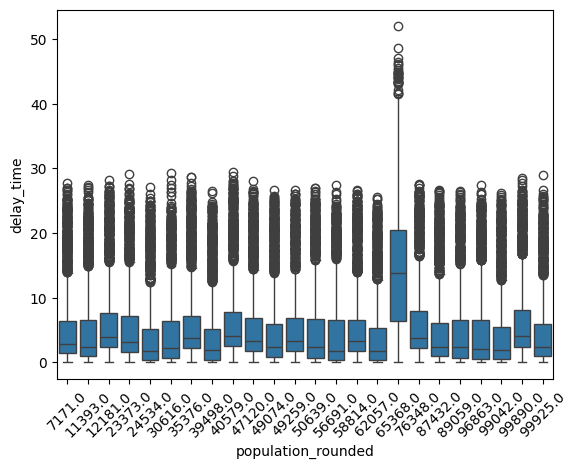

In [22]:
deliveries_enriched['population_rounded'] = deliveries_enriched['population'].round()
sns.boxplot(deliveries_enriched, x='population_rounded', y='delay_time')
plt.xticks(rotation=45)

plt.show()

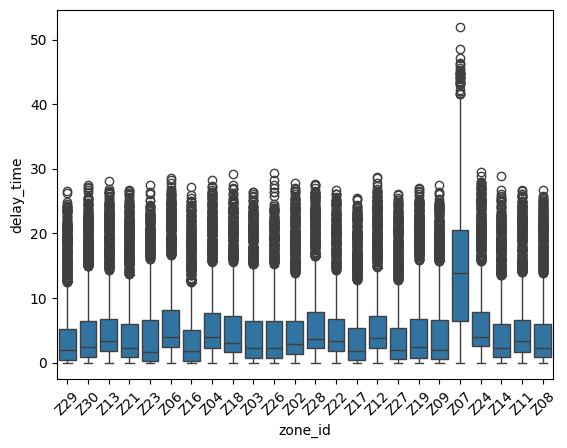

In [23]:
# deliveries_enriched['population_rounded'] = deliveries_enriched['population'].round()
sns.boxplot(deliveries_enriched, x='zone_id', y='delay_time')
plt.xticks(rotation=45)

plt.show()

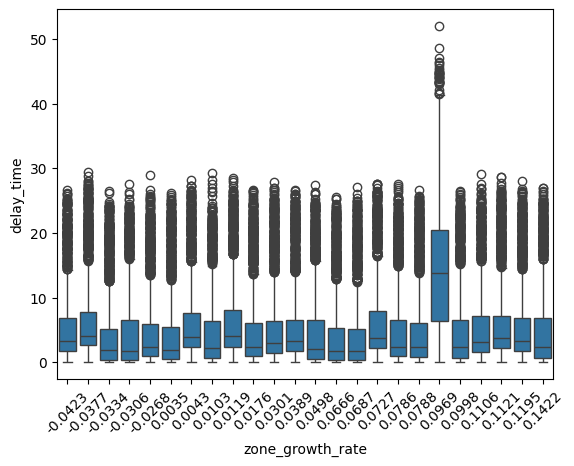

In [24]:
sns.boxplot(deliveries_enriched, x='zone_growth_rate', y='delay_time')
plt.xticks(rotation=45)

plt.show()

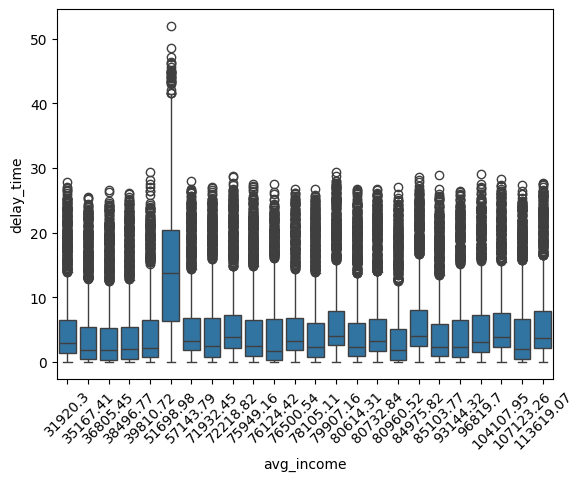

In [25]:
sns.boxplot(deliveries_enriched, x='avg_income', y='delay_time')
plt.xticks(rotation=45)

plt.show()

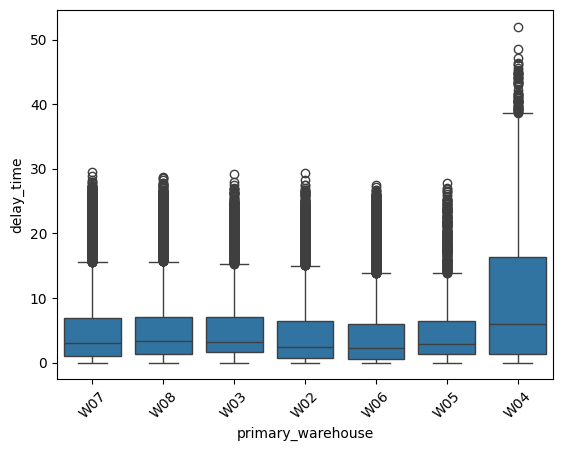

In [26]:
sns.boxplot(deliveries_enriched, x='primary_warehouse', y='delay_time')
plt.xticks(rotation=45)

plt.show()

## Additional Metrics: Zone Type & Urban Density

Beyond the previously analyzed factors, I also considered **Zone Type**  
and **Urban Density** as potential influencers of delivery performance.  

Given the patterns already observed with variables such as **Population**,  
**Zone ID**, **Average Income**, and **Primary Warehouse**, I expect a  
**similar type of variation** from Zone Type and Urban Density as well.  

If these metrics also align with the earlier findings, it would further  
strengthen the assumption that certain **geographical or demographic clusters**  
are consistently associated with higher delivery delays.  


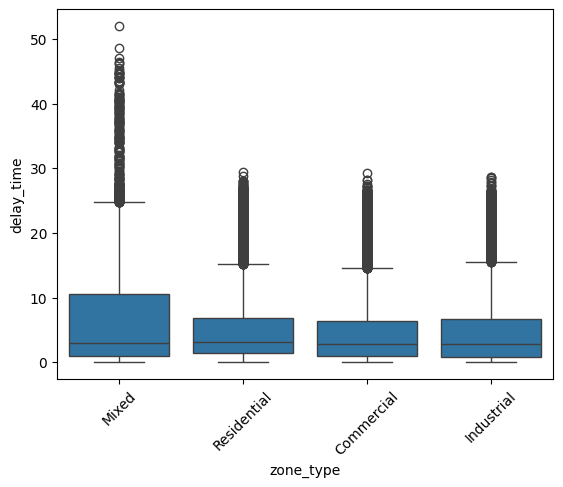

In [27]:
sns.boxplot(deliveries_enriched, x='zone_type', y='delay_time')
plt.xticks(rotation=45)

plt.show()

## Findings: Zone Type & Urban Density

As expected, the analysis of **Zone Type** and **Urban Density** revealed  
a **similar delay pattern** to the other geographical and demographic factors.  

- Deliveries in **zones with mixed Industrial, Commercial, and Residential**  
  characteristics experienced **higher delays** compared to more homogeneous zones.  
- This reinforces the earlier finding that certain **regional or structural factors**  
  (e.g., mixed-use congestion, traffic complexity, or service demand diversity)  
  may be driving delivery performance issues.  

Taken together with Population, Zone ID, Average Income, Primary Warehouse,  
and Distance from Hub, these results suggest that a **specific cluster of areas**  
is consistently contributing to longer delivery times.  

⚠️ However, without explicit regional mapping in the dataset, this conclusion  
remains an **informed assumption** rather than a confirmed fact.


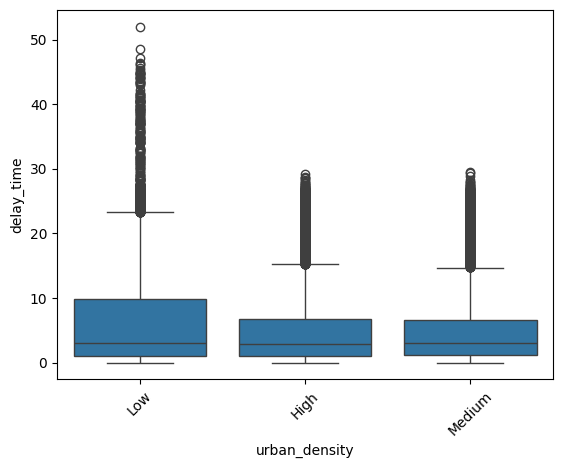

In [28]:
sns.boxplot(deliveries_enriched, x='urban_density', y='delay_time')
plt.xticks(rotation=45)

plt.show()

## Findings: Urban Density and Delivery Delays

The analysis of **Urban Density** showed a clear trend:

- Deliveries in **low-density areas** experienced **higher delays**.  
- In contrast, **medium- and high-density areas** had **lower delay times**.  

This pattern is logical because in **sparsely populated regions**, the **distance between  
consecutive delivery locations** is often larger, leading to increased travel time.  
Meanwhile, in **denser areas**, delivery points are closer together, making it easier  
to complete more deliveries in less time despite potential congestion.  

This reinforces the idea that **geographical context** (density and zone type) plays  
a critical role in shaping delivery performance.


## Parking Difficulty as a Factor in Delivery Performance

After analyzing geographical and demographic variables, I shifted focus to  
**Parking Difficulty**, which is expected to be a **crucial operational factor**  
impacting delivery performance.  


By examining parking difficulty alongside previous metrics such as **Zone Type**  
and **Urban Density**, the goal is to determine whether it reinforces the observed  
patterns of regional delivery challenges.


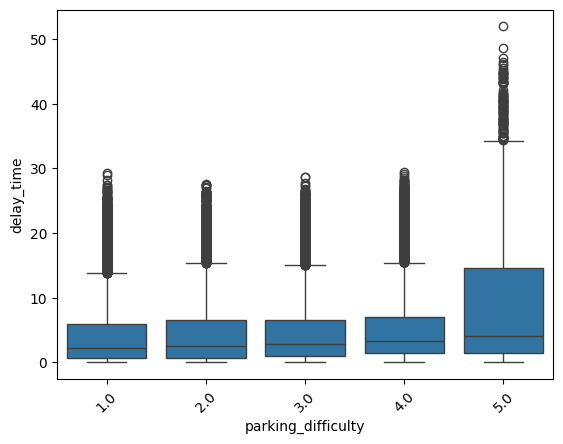

In [29]:
sns.boxplot(deliveries_enriched, x='parking_difficulty', y='delay_time')
plt.xticks(rotation=45)

plt.show()

## Findings: Parking Difficulty and Delivery Delays

As expected, **Parking Difficulty** showed a strong impact on delivery performance:  

- Deliveries in areas with **high parking difficulty** experienced **nearly double the delays**  
  compared to areas with easier parking access.  
- This confirms that parking availability is a **critical operational bottleneck**,  
  adding significant time to the delivery process.  

These results align with the broader geographic and demographic analysis, reinforcing  
that **infrastructure and accessibility challenges** — not just distance — play a  
major role in shaping delivery efficiency.  


## Conclusion

The analysis explored multiple dimensions of **delivery performance** using the enriched dataset 
(created by merging deliveries, drivers, and zones).  

### Key Findings
1. **Delay Time Distribution**  
   - Delivery delays included both positive (late) and negative (early) values.  
   - A refined metric `delivery_time` was created to focus only on positive delays.  

2. **Weather & Traffic Conditions**  
   - Initial correlation and scatterplot analyses did not show strong patterns.  
   - Boxplots revealed that **stormy/snowy weather** and **severe traffic** contributed to higher delays,  
     but they are not the sole drivers of performance.  

3. **Temporal Patterns**  
   - Months showed no significant influence on delays.  
   - **Weekdays revealed clear patterns**: Mondays and Wednesdays had higher delays, while Tuesdays showed the lowest.  

4. **Geographical & Demographic Factors**  
   - **Distance from Hub**: Surprisingly, middle-range distances showed the highest delays.  
   - **Population, Zone ID, Average Income, Primary Warehouse, Zone Type**: Similar patterns suggested 
     that a particular group of regions ( Zone 7 ) or warehouses may be consistently underperforming (though this cannot be fully confirmed with the available data).  
   - **Urban Density**: Low-density areas had higher delays, likely due to longer travel between delivery points.  
   - **Parking Difficulty**: Areas with high parking difficulty showed almost **double the delays**, making it a critical operational factor.  

5. **Vehicle Type, Cost, and Profitability**  
   - No strong patterns emerged when analyzing these variables, suggesting vehicle type is not a standalone driver of performance.  

### Overall Insight
The analysis indicates that **operational and geographic factors** such as  
**weekday scheduling, zone characteristics, density, and parking difficulty**  
play a stronger role in influencing delivery performance than weather, traffic, or vehicle type.  

From domain knowledge, I also considered additional factors:  
- **Automated Sorting**: I expected warehouses with automated sorting to show faster order processing  
  and improved delivery performance, but no measurable impact was observed in the data.  
- **Bonus Schemes**: From experience, delivery associates often work faster during peak seasons when  
  bonus schemes are active. However, in this dataset, bonuses showed **no significant effect** on  
  delivery delays.  


### Limitations
- Missing explicit links (e.g., between zones, warehouses, and demographics) required assumptions.  
- Correlation analysis alone was insufficient; patterns were mainly revealed through exploratory plots.  

### Recommendations
- **Peak Weekdays**: Mondays and Wednesdays consistently show higher delays, likely due to heavy traffic  
  and large weekend order volumes. Increasing **delivery associates** or **adding extra shifts** on these  
  days may reduce backlogs.  
- **Tuesday Dip**: The sharp drop in delays on Tuesdays could indicate a holiday. If not, redistributing  
  workload from Mondays/Wednesdays to Tuesday could improve overall performance.  
- **Geographical Risks**: Zone 7, in particular, showed significantly higher delays and should be  
  prioritized for further investigation and operational improvements.  
- **Mid-Range Hubs & Parking**: Investigate routing inefficiencies in mid-range hubs and address  
  parking challenges to minimize double delays.  
